In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# to create synthetic data
from sklearn.datasets import make_blobs

# Visualization package import

# imports for modeling and evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [2]:
# creating random number generator
rng = np.random.default_rng(seed=44)

In [3]:
centers = rng.integers(low=3, high=7) # 4,5 or 6
# creating synthetic data with unknown number of clusters
X, y = make_blobs(n_samples=1000, n_features=6, centers=centers, random_state=42)

In [4]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5
0,-1.534288,5.467808,-6.945988,1.403934,1.553836,-7.618236
1,-6.681020,6.717808,2.764396,4.460744,-8.286569,10.959708
2,-8.678310,7.825306,3.139699,5.609951,-9.948079,8.072149
3,-6.667385,7.147637,2.145505,4.712937,-9.544708,11.093248
4,-2.753835,-4.209968,0.620345,-7.439505,-4.405723,-2.046149


scaling the data because k-means relies on distance, and features with larger units would otherwise dominate the clustering.

for example, if **height** is measured in meters (values like 1.7 or 1.8) and **weight** is measured in grams (values like 70,000 or 80,000), then weight will dominate the distance calculation unless the data is scaled.

In [5]:
X_scaled = StandardScaler().fit_transform(X)

In [6]:
# instantiating model
kmeans3 = KMeans(n_clusters=3, random_state=42)

# fitting model to data
kmeans3.fit(X_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [7]:
print('Clusters: ', kmeans3.labels_)
print('Inertia: ', kmeans3.inertia_)

Clusters:  [2 0 0 0 1 1 1 0 0 2 1 0 0 2 0 0 0 0 1 1 1 0 0 0 2 2 1 0 0 1 1 0 1 1 2 2 1
 0 0 0 1 0 1 0 0 1 1 2 0 2 1 1 1 2 2 2 1 0 1 2 1 1 1 1 1 1 1 2 1 1 0 1 1 1
 0 1 0 2 2 0 2 0 1 2 1 0 2 2 0 2 0 1 2 0 1 2 1 0 0 1 1 0 0 0 0 0 0 1 1 0 2
 1 0 1 0 0 1 1 2 1 1 1 0 1 1 0 0 1 2 0 2 2 2 1 0 2 2 1 0 1 1 1 0 2 2 2 1 1
 0 1 1 0 1 1 0 0 2 0 2 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 2 0 0 2 2 1 0 1 0 1
 0 2 0 2 0 1 1 1 0 0 0 2 2 0 1 0 0 1 0 1 1 1 1 1 2 1 2 0 0 1 2 2 0 1 1 2 1
 0 0 0 0 1 1 1 0 2 1 2 0 2 0 2 1 1 0 0 0 2 2 1 1 2 2 2 0 0 0 1 1 1 0 0 0 1
 0 1 2 1 0 0 2 2 1 1 0 1 2 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 2 1 0 1 2 2
 1 0 0 1 0 0 0 0 0 0 2 0 2 1 0 0 2 1 1 0 1 0 0 2 0 1 0 0 0 1 1 1 2 2 2 1 2
 2 2 0 0 2 0 2 1 0 1 2 0 2 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 2 0 0 0 0 0 1 1 2
 1 0 0 1 0 1 1 0 1 0 2 0 0 1 0 1 1 2 0 1 1 1 2 1 1 0 1 0 1 0 2 0 1 0 0 1 1
 2 0 1 1 2 1 1 0 0 0 0 1 0 1 0 0 2 2 1 2 1 1 1 0 0 2 1 0 0 0 1 0 1 0 2 0 1
 2 1 1 1 0 1 2 0 1 2 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 2 1 2 0 1 1 1 1 2 0
 0 1 0 0 2 2 0

the inertia value is not helpful by itself. we need to compare the inertias of multiple k values.

In [8]:
num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia

In [9]:
inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

[3686.2501587328,
 1748.1488703079513,
 1124.6368935738392,
 239.6543475871843,
 232.72871508015132,
 224.29675072289982,
 216.2278431802691,
 210.98989981553572,
 202.3018106935965]

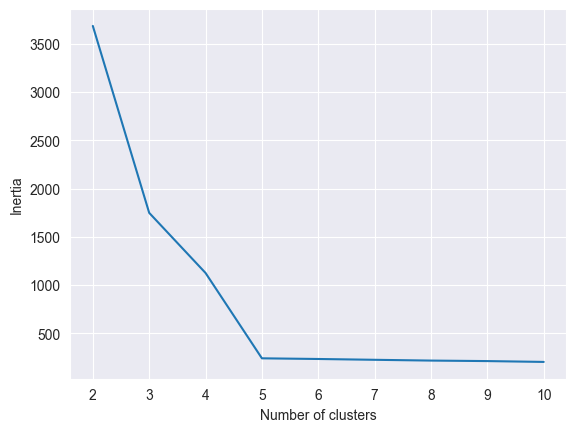

In [10]:
plot = sns.lineplot(x=num_clusters, y=inertia)
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

the plot contains a significant elbow at 5 clusters. models with five clusters don't seem to reduce inertia much at all. so it seems like 5-cluster model might be optimal.

now we should check silhouette scores. hopefully the results will corroborate our findings from the assessment of inertia

In [11]:
# getting silhouette score for kmeans3 model
kmeans3_sil_score = silhouette_score(X_scaled, kmeans3.labels_)
kmeans3_sil_score

0.5815196371994132

In [12]:
def kmeans_sil(num_clusters, x_vals):
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score

In [13]:
sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

[0.42005966017510427,
 0.5815196371994132,
 0.649060841277744,
 0.7670656870960783,
 0.6376325996351013,
 0.5100290191946067,
 0.40247710151045196,
 0.3998551090636553,
 0.2748795855657769]

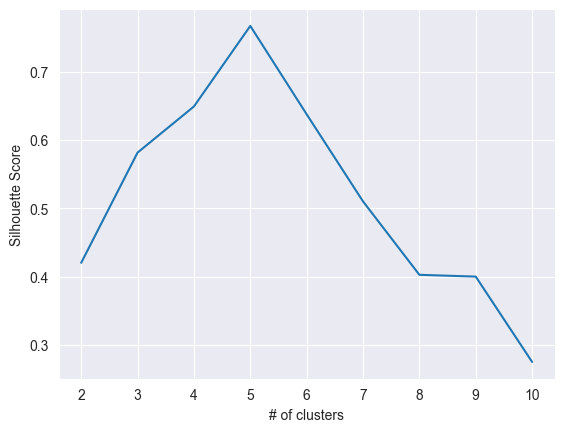

In [14]:
plot = sns.lineplot(x=num_clusters, y=sil_score)
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

this plot indicates that the silhouette score is closest to 1 when our data is partitioned into five clusters. it confirms what we saw in the inertia analysis, where we noticed an elbow where k=5.

In [15]:
# verifying our findings (only possible when "correct" number of clusters exists)
centers

np.int64(5)

##### further analysis

In [16]:
kmeans5 = KMeans(n_clusters=5, random_state=42)
kmeans5.fit(X_scaled)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [18]:
print(kmeans5.labels_[:5])
print('Unique labels:', np.unique(kmeans5.labels_))

[2 4 4 4 1]
Unique labels: [0 1 2 3 4]


In [19]:
# creating new column that indicates cluster assignment in original dataframe
X['cluster'] = kmeans5.labels_
X.head()

,0,1,2,3,4,5,cluster
0,-1.534288,5.467808,-6.945988,1.403934,1.553836,-7.618236,2
1,-6.681020,6.717808,2.764396,4.460744,-8.286569,10.959708,4
2,-8.678310,7.825306,3.139699,5.609951,-9.948079,8.072149,4
3,-6.667385,7.147637,2.145505,4.712937,-9.544708,11.093248,4
4,-2.753835,-4.209968,0.620345,-7.439505,-4.405723,-2.046149,1


##### predicting on new data

In [20]:
# creating a new observation
new_observation = rng.uniform(low=-10, high=10, size=6).reshape(1, -1)
new_observation

array([[-4.8377385 , -1.88458544,  9.38367896, -6.7536575 ,  7.14587347,
        -6.73909458]])

In [22]:
scaler = StandardScaler().fit(X.iloc[:,:-1]) # cluster column excluded

# applying the scaler to the new observation
new_observation_scaled = scaler.transform(new_observation)
new_observation_scaled

array([[-0.68535259, -0.67430308,  2.1532887 , -1.15878741,  3.01424824,
        -0.75609599]])

In [24]:
new_prediction = kmeans5.predict(new_observation_scaled)
new_prediction

array([1], dtype=int32)

##### calculating the distances between new data and each centriod

In [25]:
distances = kmeans5.transform(new_observation_scaled)
distances

array([[4.55233304, 3.46792667, 4.14567617, 5.11675395, 5.95732403]])